## Cluster Analysis 

### Create new dataset with relevant features: 
- Average time taken for each problem (d) 
- average accuracy (d)
- Number of times a user upgrades (d)
- Number of time a user downgrades (d)
- Average time between each exercise 
- no. of hints used per qns attempted (d) 
- points (d)
- user grade (d) 
- teacher count (d)
- student count (d)
- class count (d)
- belongs to count (d) 
- badges count (d)

In [4]:
# Import libraries 
import pandas as pd 
import numpy as np 
import re  
import seaborn as sns 
import matplotlib.pyplot as plt
import os

In [118]:
# %% load data
data_dir = r'C:\Users\Timothy Lim\Desktop\junyi\archive'
info_content = pd.read_csv(os.path.join(data_dir, 'Info_Content.csv'))
info_userdata = pd.read_csv(os.path.join(data_dir, 'Info_UserData.csv'))
log_problem = pd.read_csv(os.path.join(data_dir, 'Log_Problem.csv'))

In [119]:
log_problem

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level
0,2019-05-26 21:00:00 UTC,FLy+lviglNR5Y1l0Xiijnl6QHySBcpKHJLCtQ6ogm2Q=,KDOmuTrY/IJzDP4kIgIYCBiGyTymsJ8Iy4cDB35WGYg=,Vbs92l4JmdiWkUEm/iahxnUTaac2oN1IlUtXB7JcfoE=,18,2,True,33,1,0,False,False,True,3
1,2019-05-17 16:30:00 UTC,+Gqj2nalc6M9fusyVECTC0AN7UQdDQTXESIuElkDltU=,COZ39Wo+uIUO2s7c2VGEHjJf6Vx0xifxVAiaeHtaTdk=,Ek+pIeHNNoEo0tGEq91eBcBmGgy3+A5RWhpj95zTyHM=,4,1,True,8,1,0,False,NaN,NaN,0
2,2019-05-15 19:15:00 UTC,6D5QN8j8ng/VR74ES3A0zqAj0bIFFyaKjKEj8ZyXjQ8=,TwyqyV1uJYlDAX8wX/PtTCVZEBo/APIVfTzzleGkNCQ=,1MBa2f5Qog4JBoAuUfJf0fxeJctdEirAqKgfsg246eI=,9,1,True,17,1,0,False,NaN,NaN,0
3,2019-05-05 14:45:00 UTC,GgTZuCqZXObthtK6GAwqvlHrTMm5pKHWeezQxL/pcKc=,tBo6ECyT8IlKAM8UhQHWkqv92PRLcSiwuerfC7vNX+w=,kdMy2nG+QVMjPkuaMEWs0yV/sYZVoG1vm7zM0fCy+qk=,2,1,True,10,1,0,False,NaN,NaN,0
4,2019-05-14 16:45:00 UTC,JMNKWoU0CkMSzgQ8bCnmCYlD8jEzAVge3lHMYLXKM2g=,vVpSKAMQbTMvtdERR0ksOeRmmaFt0R210t4Z//0RpPA=,jjPR8fmkLSFoCQQYB4g6kI8mgdcK3sKtMirKUvfmZIk=,6,1,True,98,1,0,False,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16217306,2019-04-28 18:30:00 UTC,OhWXH8C9z/xwoVDoZ8E5HlQcZKQT90HeNxiMoBb8zu4=,dp0m1kS6Bygoksx9S/gkBqTcWPoglbf1HT3Ma3U3N8U=,HROyctImDBKuPzjUmVSIohpPweqOuiui22XdmzgKM8I=,7,1,True,11,1,0,False,False,True,2
16217307,2019-04-25 19:15:00 UTC,EuYrT0f2bBxb1mZgHVsuxgwx3v1M5ObPf6Hxx5JGoYE=,WIVV2NtKYatcEnMpVQbIYkGSMd8Q9Xt74y5a+V5bXs0=,KbXWuEmsRHIjtQ0iVYmnpnPoDPzKMSRYo7QiezC664s=,24,2,True,31,1,0,False,False,True,2
16217308,2019-04-25 21:30:00 UTC,CCM2Y18/BIKVuA1YF76my0pEPuniFUQGDaHB/uRnvak=,ZcwX8fZUrnZDOsvBOPux3Oaf1viIG83MNe5frh0jnQw=,tfg/S0CdP/aN7ZW8N1hhSJ1Nq/bOFXdtLGkpQYFMzBg=,10,1,True,32,1,0,False,NaN,NaN,0
16217309,2019-04-12 16:30:00 UTC,kdK8yywPKV0DPbIC7gagzvPyxpC05fA4T9GCBscO2Rk=,HKqPgUALqZGw984KFqAMeDwDJTi9cNhJ51UXfjzELSg=,qAAyk/Jf5/muzMzQ9YaWGQPT10enAZctCKNrm3dQ1IY=,40,3,True,22,1,0,False,NaN,NaN,2


In [120]:
# for each student, what was the avg time they spent per problem? 
avg_time_problem = log_problem.groupby(by='uuid')['total_sec_taken'].mean()
avg_time_problem

uuid
++5bdNp/LZvGenJ8Brp4n2SfS9d4pu4qA7cF7FQW7hk=     60.400000
++9EkR6syMGk44XpyhOj40cg9xiXwCLS/TwEy+ujrL0=     14.758621
++E4TrlDYvGtPBg1edhkLXLEEbnfiAgAamPQ33vpW8M=     89.800000
++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=     37.804878
++GobOSWqrsaxoRg1bMN+T6biIJcgBXwuOH/ddq3DiU=     31.890323
                                                   ...    
zztwLsjf44Uzumou84qh04wObpugkIllLCIp/mgoMu8=    130.307692
zzueVRV14tXIEgW4ixiqmtPNaFYz4MIifbMM/H2tmqA=     87.333333
zzujjvdKzb4wL8cFKdF3Of5gg2XHzIDQCZ2TfaYpSNs=     46.907173
zzvvUOwcSXXTXd8xoyimNcm2DjeVPLmZAI19WKfhSAM=     10.217391
zzyukk9LNl7j/9xxgZj6roQBbGn1MjSPTCgc0r5sXpU=     16.436782
Name: total_sec_taken, Length: 72758, dtype: float64

In [121]:
# student accuracy
student_accuracy = log_problem.groupby(by='uuid')['is_correct'].mean()
student_accuracy

uuid
++5bdNp/LZvGenJ8Brp4n2SfS9d4pu4qA7cF7FQW7hk=    1.000000
++9EkR6syMGk44XpyhOj40cg9xiXwCLS/TwEy+ujrL0=    0.103448
++E4TrlDYvGtPBg1edhkLXLEEbnfiAgAamPQ33vpW8M=    0.700000
++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=    0.560976
++GobOSWqrsaxoRg1bMN+T6biIJcgBXwuOH/ddq3DiU=    0.883871
                                                  ...   
zztwLsjf44Uzumou84qh04wObpugkIllLCIp/mgoMu8=    0.884615
zzueVRV14tXIEgW4ixiqmtPNaFYz4MIifbMM/H2tmqA=    0.666667
zzujjvdKzb4wL8cFKdF3Of5gg2XHzIDQCZ2TfaYpSNs=    0.552743
zzvvUOwcSXXTXd8xoyimNcm2DjeVPLmZAI19WKfhSAM=    0.956522
zzyukk9LNl7j/9xxgZj6roQBbGn1MjSPTCgc0r5sXpU=    0.741379
Name: is_correct, Length: 72758, dtype: float64

In [122]:
# no. of upgrades and downgrades
n_upgrades = log_problem.groupby(by='uuid')['is_upgrade'].sum()
n_downgrades = log_problem.groupby(by='uuid')['is_downgrade'].sum()

In [123]:
# no. of hints used per qns attempted
n_hints_per_attempted = log_problem.groupby(by='uuid')['is_hint_used'].mean()
n_hints_per_attempted

uuid
++5bdNp/LZvGenJ8Brp4n2SfS9d4pu4qA7cF7FQW7hk=    0.000000
++9EkR6syMGk44XpyhOj40cg9xiXwCLS/TwEy+ujrL0=    0.724138
++E4TrlDYvGtPBg1edhkLXLEEbnfiAgAamPQ33vpW8M=    0.300000
++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=    0.439024
++GobOSWqrsaxoRg1bMN+T6biIJcgBXwuOH/ddq3DiU=    0.032258
                                                  ...   
zztwLsjf44Uzumou84qh04wObpugkIllLCIp/mgoMu8=    0.115385
zzueVRV14tXIEgW4ixiqmtPNaFYz4MIifbMM/H2tmqA=    0.259259
zzujjvdKzb4wL8cFKdF3Of5gg2XHzIDQCZ2TfaYpSNs=    0.295359
zzvvUOwcSXXTXd8xoyimNcm2DjeVPLmZAI19WKfhSAM=    0.043478
zzyukk9LNl7j/9xxgZj6roQBbGn1MjSPTCgc0r5sXpU=    0.172414
Name: is_hint_used, Length: 72758, dtype: float64

In [124]:
import datetime as dt
log_problem['timestamp_TW'] = log_problem['timestamp_TW'].apply(lambda x: dt.datetime.strptime(x[:-4], "%Y-%m-%d %H:%M:%S"))
log_problem.sort_values(by='timestamp_TW', ascending=True, inplace=True)
log_problem.head()

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level
105021,2018-08-01 07:45:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,9Ksy3bdm0HTi0D+cdKSBKDQJjo5GNahep91FqHUrpts=,2,1,True,8,1,0,False,NaN,NaN,0
11669798,2018-08-01 07:45:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,/Wgjdl2BsldHZDdXXvzwGimusaMX548lqV2b7PgwXAs=,1,1,True,10,1,0,False,NaN,NaN,0
3768239,2018-08-01 07:45:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,vsGlLPd9C58B8myBoGMGre2pDHjh62eRjsqX57D98fU=,5,1,True,6,1,0,False,False,True,1
10163558,2018-08-01 07:45:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,h3CI/U4QJd6mjYE5xRH8QEst8lRG7otYIz+q1V6Och4=,5,1,True,5,1,0,False,False,True,1
8372688,2018-08-01 07:45:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,OSuDd4rDo2muXXwwJRU2DQVHkk6/JOGgNzfzNi4PMJM=,3,1,True,4,1,0,False,NaN,NaN,0


In [125]:
log_problem.tail()

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level
5351619,2019-08-01,liamj78o0Ae2wnaS0hq7LUfSTsp3xB6HEcffaKBUzGc=,lG8uYsrQADh32pvOcrvytT25qo4UpZUGkrybb4ycFEs=,6yQTtifKhIRKCTcjWwYgZEJgiJeKvNzlI9b5pRh5d4s=,6,1,True,18,1,0,False,False,True,1
8225534,2019-08-01,DndeYzUnQn5RMFK82bE5EUK7UeWFnO3VgT7uAuluqTM=,Av3E5D+JWfyHjDr2vSsiW200MsgBmim5sLZc4UBQM/0=,/ehY6iTAB3z7NB52RLi87aynoVLADwEjle/pIW6WHig=,9,1,True,7,1,0,False,NaN,NaN,1
14727695,2019-08-01,t2N6muKWIarXYsUVv/M4rOx/+Qe0Gy9eC0ufuf7vZ0c=,GcuG2ukgxXmym9WSnWnlpKVNUFysZ8QfpAgpJMcheMU=,HEFfwmy7pwKhEadwn+17iN+Ik+TEWh7KE6fbKWuf0RU=,6,1,False,102,2,0,False,NaN,NaN,1
13201613,2019-08-01,hCyJTrhgUprNNWpJYKPcyHIxDHnbW91tv0OEM0wXSuI=,Wk1PobqnhB1FsjjiU84gVNe9j4O6SLWWYfvGb/l6MR4=,o1ITX1QcpkBe8d4UjsZH3yUfBC9caKoPTJV7Ls6IqNE=,5,1,True,5,1,0,False,False,True,1
15112240,2019-08-01,liamj78o0Ae2wnaS0hq7LUfSTsp3xB6HEcffaKBUzGc=,zcH7Yl/gFwkU2Mej9UzQgaJL66wIdiMucPZwVyeqHxc=,Ms5i+EI/9bpS14wA2YcLHjmfReyVKqfjXuXJe2o9ds8=,1,1,True,31,1,0,False,NaN,NaN,0


In [126]:
# shift cols down by 1
log_problem['ucid_shifted'] = log_problem.groupby(by='uuid', sort=False)['ucid'].shift(1)
log_problem['timestamp_shifted'] = log_problem.groupby(by='uuid', sort=False)['timestamp_TW'].shift(1)
log_problem[log_problem['uuid']==log_problem['uuid'][100]][['timestamp_TW', 'timestamp_shifted', 'ucid', 'ucid_shifted']]

,timestamp_TW,timestamp_shifted,ucid,ucid_shifted
9423058,2019-05-30 16:45:00,NaT,A2548sl8hqkIMIGY7mlg/p2NN83cncQx2SgT00lyByk=,NaN
100,2019-05-30 16:45:00,2019-05-30 16:45:00,A2548sl8hqkIMIGY7mlg/p2NN83cncQx2SgT00lyByk=,A2548sl8hqkIMIGY7mlg/p2NN83cncQx2SgT00lyByk=
12909679,2019-05-30 16:45:00,2019-05-30 16:45:00,Jl92cIZYcCutl8sqyj2VP8UbUigvqBoHBO/R38DK1DU=,A2548sl8hqkIMIGY7mlg/p2NN83cncQx2SgT00lyByk=
3181643,2019-05-30 16:45:00,2019-05-30 16:45:00,A2548sl8hqkIMIGY7mlg/p2NN83cncQx2SgT00lyByk=,Jl92cIZYcCutl8sqyj2VP8UbUigvqBoHBO/R38DK1DU=
16105881,2019-05-30 16:45:00,2019-05-30 16:45:00,A2548sl8hqkIMIGY7mlg/p2NN83cncQx2SgT00lyByk=,A2548sl8hqkIMIGY7mlg/p2NN83cncQx2SgT00lyByk=
...,...,...,...,...
6673029,2019-06-05 13:30:00,2019-06-05 13:15:00,xaWHtJt0hf186kbfofLHHt94c0qSZE3L7nvrmIAexws=,z5YJ7GOEyGfxENlfIjBKbMbTzhp3V5TS6Zp62Y/PKPc=
4907715,2019-06-05 13:30:00,2019-06-05 13:30:00,xaWHtJt0hf186kbfofLHHt94c0qSZE3L7nvrmIAexws=,xaWHtJt0hf186kbfofLHHt94c0qSZE3L7nvrmIAexws=
12714752,2019-06-05 13:30:00,2019-06-05 13:30:00,xaWHtJt0hf186kbfofLHHt94c0qSZE3L7nvrmIAexws=,xaWHtJt0hf186kbfofLHHt94c0qSZE3L7nvrmIAexws=
1951229,2019-06-05 13:30:00,2019-06-05 13:30:00,xaWHtJt0hf186kbfofLHHt94c0qSZE3L7nvrmIAexws=,xaWHtJt0hf186kbfofLHHt94c0qSZE3L7nvrmIAexws=


In [127]:
# keep relevant rows
mask = (log_problem['ucid']!=log_problem['ucid_shifted']) & (log_problem['ucid_shifted'].notna())
relevant_logs = log_problem[mask]

# find time diff
relevant_logs['time_diff'] = (relevant_logs['timestamp_TW'] - relevant_logs['timestamp_shifted']).dt.total_seconds()

# get avg time
avg_time = relevant_logs.groupby(by='uuid')['time_diff'].mean()
avg_time

C:\Users\Timothy Lim\Anaconda3\envs\capstone\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


uuid
++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=     33369.230769
++GobOSWqrsaxoRg1bMN+T6biIJcgBXwuOH/ddq3DiU=     52846.601942
++KRUQaY4gFsmV7egJVOWqbqbTth/oJBB7yX1HvCSL4=     54818.181818
++LzeMQy/8bNUGD2K5Ms/GdiBlQ16ii82xNw3BYtOZE=     35804.651163
++N4tZH9IkIqtzD06TVvEK4rjiCHFSSqhCtuDhxJvII=      1687.500000
                                                    ...      
zztwLsjf44Uzumou84qh04wObpugkIllLCIp/mgoMu8=       270.000000
zzueVRV14tXIEgW4ixiqmtPNaFYz4MIifbMM/H2tmqA=       120.000000
zzujjvdKzb4wL8cFKdF3Of5gg2XHzIDQCZ2TfaYpSNs=    206502.352941
zzvvUOwcSXXTXd8xoyimNcm2DjeVPLmZAI19WKfhSAM=       120.000000
zzyukk9LNl7j/9xxgZj6roQBbGn1MjSPTCgc0r5sXpU=    208050.000000
Name: time_diff, Length: 62915, dtype: float64

In [163]:
# check
user = 'zzvvUOwcSXXTXd8xoyimNcm2DjeVPLmZAI19WKfhSAM='
relevant_logs[relevant_logs['uuid']==user][['timestamp_TW', 'timestamp_shifted', 'time_diff']]

,timestamp_TW,timestamp_shifted,time_diff
9878275,2018-10-18 15:15:00,2018-10-18 14:45:00,1800.0
13894993,2018-10-18 15:15:00,2018-10-18 15:15:00,0.0
2543842,2018-10-18 15:15:00,2018-10-18 15:15:00,0.0
15327539,2018-10-18 15:15:00,2018-10-18 15:15:00,0.0
11748199,2018-10-18 15:15:00,2018-10-18 15:15:00,0.0
5328350,2018-10-18 15:15:00,2018-10-18 15:15:00,0.0
3975278,2018-10-18 15:15:00,2018-10-18 15:15:00,0.0
5507915,2018-10-18 15:15:00,2018-10-18 15:15:00,0.0
2303509,2018-10-18 15:15:00,2018-10-18 15:15:00,0.0
2335811,2018-10-18 15:15:00,2018-10-18 15:15:00,0.0


In [129]:
# check no negative vals
avg_time.min()

0.0

In [162]:
user = 'zzvvUOwcSXXTXd8xoyimNcm2DjeVPLmZAI19WKfhSAM='
mask = log_problem['uuid']==user
log_problem[mask][['ucid', 'ucid_shifted', 'timestamp_TW', 'timestamp_shifted']]

,ucid,ucid_shifted,timestamp_TW,timestamp_shifted
5787556,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,NaN,2018-10-18 14:45:00,NaT
4959781,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,2018-10-18 14:45:00,2018-10-18 14:45:00
9878275,TwyqyV1uJYlDAX8wX/PtTCVZEBo/APIVfTzzleGkNCQ=,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,2018-10-18 15:15:00,2018-10-18 14:45:00
13894993,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,TwyqyV1uJYlDAX8wX/PtTCVZEBo/APIVfTzzleGkNCQ=,2018-10-18 15:15:00,2018-10-18 15:15:00
2543842,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,2018-10-18 15:15:00,2018-10-18 15:15:00
5033907,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,2018-10-18 15:15:00,2018-10-18 15:15:00
662089,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,2018-10-18 15:15:00,2018-10-18 15:15:00
15327539,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,2018-10-18 15:15:00,2018-10-18 15:15:00
11748199,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,2018-10-18 15:15:00,2018-10-18 15:15:00
5328350,TwyqyV1uJYlDAX8wX/PtTCVZEBo/APIVfTzzleGkNCQ=,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,2018-10-18 15:15:00,2018-10-18 15:15:00


In [213]:
# merge everything together
avg_time_problem.name = 'avg_time_per_problem'
student_accuracy.name = 'avg_accuracy'
n_downgrades.name = 'n_downgrades'
n_upgrades.name = 'n_upgrades'
n_hints_per_attempted.name = 'n_hints_per_attempted'
avg_time.name = 'avg_time_btwn_ex'

clustering_input = pd.concat([avg_time_problem, student_accuracy, n_downgrades, n_upgrades, n_hints_per_attempted,
                              avg_time], axis=1)
clustering_input

,avg_time_per_problem,avg_accuracy,n_downgrades,n_upgrades,n_hints_per_attempted,avg_time_btwn_ex
uuid,,,,,,
++5bdNp/LZvGenJ8Brp4n2SfS9d4pu4qA7cF7FQW7hk=,60.400000,1.000000,0,1,0.000000,NaN
++9EkR6syMGk44XpyhOj40cg9xiXwCLS/TwEy+ujrL0=,14.758621,0.103448,0,0,0.724138,NaN
++E4TrlDYvGtPBg1edhkLXLEEbnfiAgAamPQ33vpW8M=,89.800000,0.700000,0,1,0.300000,NaN
++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=,37.804878,0.560976,0,2,0.439024,33369.230769
++GobOSWqrsaxoRg1bMN+T6biIJcgBXwuOH/ddq3DiU=,31.890323,0.883871,0,19,0.032258,52846.601942
...,...,...,...,...,...,...
zztwLsjf44Uzumou84qh04wObpugkIllLCIp/mgoMu8=,130.307692,0.884615,0,4,0.115385,270.000000
zzueVRV14tXIEgW4ixiqmtPNaFYz4MIifbMM/H2tmqA=,87.333333,0.666667,0,3,0.259259,120.000000
zzujjvdKzb4wL8cFKdF3Of5gg2XHzIDQCZ2TfaYpSNs=,46.907173,0.552743,0,17,0.295359,206502.352941


In [214]:
cols_wanted = ['points', 'badges_cnt', 'user_grade', 'has_teacher_cnt', 'has_student_cnt', 'has_class_cnt',
               'belongs_to_class_cnt']

clustering_input = clustering_input.merge(info_userdata[cols_wanted + ['uuid']], left_index=True, right_on='uuid')
clustering_input.set_index('uuid', inplace=True)

In [215]:
clustering_input.isna().sum()

avg_time_per_problem        0
avg_accuracy                0
n_downgrades                0
n_upgrades                  0
n_hints_per_attempted       0
avg_time_btwn_ex         9843
points                      0
badges_cnt                  0
user_grade                  0
has_teacher_cnt             0
has_student_cnt             0
has_class_cnt               0
belongs_to_class_cnt        0
dtype: int64

In [216]:
clustering_input.fillna(0, inplace=True)

### Clustering
* feature scaling / PCA
    * ideally we want each feature to have a similar scale
* K-means clustering
* hierarchial clustering

In [253]:
from sklearn.cluster import KMeans

def scale_data(data, scaler):
    scaled_data = pd.DataFrame(scaler.fit_transform(data[data.columns]))
    scaled_data.columns = data.columns
    return scaled_data

def viz_data(data):
    # check distribution
    fig, axes = plt.subplots(5, 3, figsize=(22, 20))

    for i, col in enumerate(data.columns):
        target_ax = axes[i // 3, i % 3]
        data[col].plot(kind='hist', ax=target_ax,
                       title=f'distribution of {col}')
    plt.show()

def search_elbow(data):
    clusters = []

    for i in range(1, 11):
        km = KMeans(n_clusters=i).fit(data)
        clusters.append(km.inertia_)

    fig, ax = plt.subplots(figsize=(12, 8))
    sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
    ax.set_title('Searching for Elbow')
    ax.set_xlabel('Clusters')
    ax.set_ylabel('Inertia')

    plt.show()

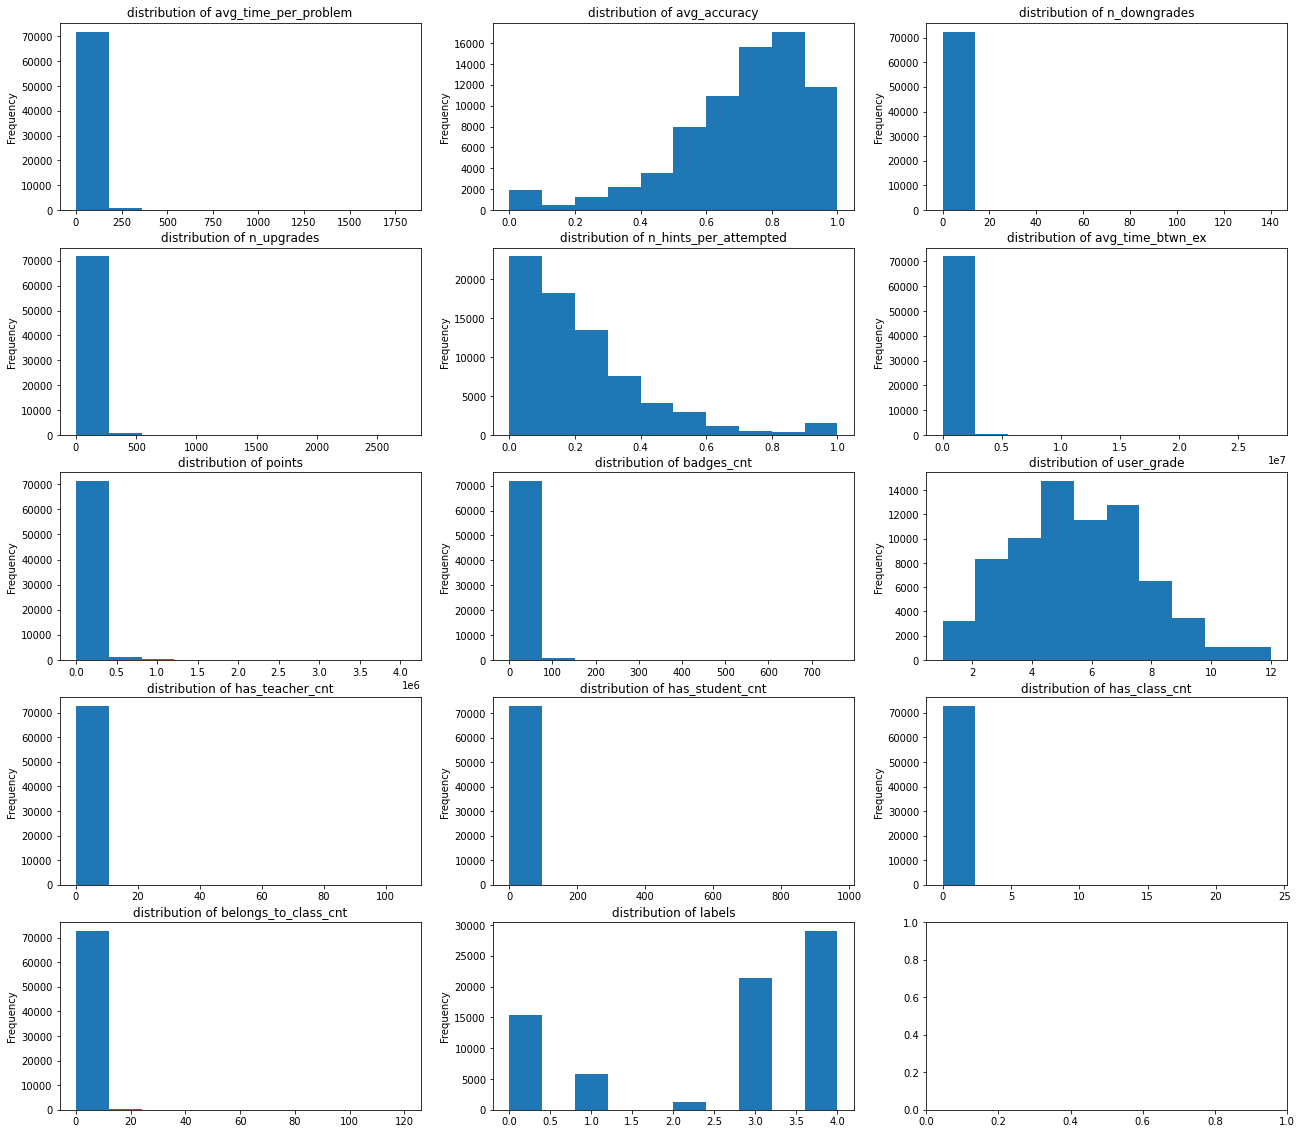

In [296]:
# check distribution of original data
viz_data(clustering_input)

Most of the features are quite skewed. Should look to scale the data

In [245]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()  # can try using standard scaler also, not sure abt difference
scaled_clustering_input = scale_data(clustering_input, scaler)
scaled_clustering_input

,avg_time_per_problem,avg_accuracy,n_downgrades,n_upgrades,n_hints_per_attempted,avg_time_btwn_ex,points,badges_cnt,user_grade,has_teacher_cnt,has_student_cnt,has_class_cnt,belongs_to_class_cnt
0,0.033556,1.000000,0.0,0.000367,0.000000,0.000000,0.004132,0.001316,0.545455,0.009434,0.0,0.0,0.008333
1,0.008199,0.103448,0.0,0.000000,0.724138,0.000000,0.000296,0.003947,0.545455,0.009434,0.0,0.0,0.008333
2,0.049889,0.700000,0.0,0.000367,0.300000,0.000000,0.002355,0.000000,0.363636,0.009434,0.0,0.0,0.008333
3,0.021003,0.560976,0.0,0.000734,0.439024,0.001201,0.001983,0.000000,0.454545,0.009434,0.0,0.0,0.008333
4,0.017717,0.883871,0.0,0.006970,0.032258,0.001902,0.010335,0.002632,0.545455,0.009434,0.0,0.0,0.008333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72753,0.072393,0.884615,0.0,0.001467,0.115385,0.000010,0.001853,0.000000,0.727273,0.009434,0.0,0.0,0.008333
72754,0.048519,0.666667,0.0,0.001101,0.259259,0.000004,0.000926,0.000000,0.272727,0.000000,0.0,0.0,0.000000
72755,0.026060,0.552743,0.0,0.006236,0.295359,0.007431,0.008244,0.005263,0.181818,0.028302,0.0,0.0,0.033333
72756,0.005676,0.956522,0.0,0.001101,0.043478,0.000004,0.001975,0.001316,0.363636,0.009434,0.0,0.0,0.000000


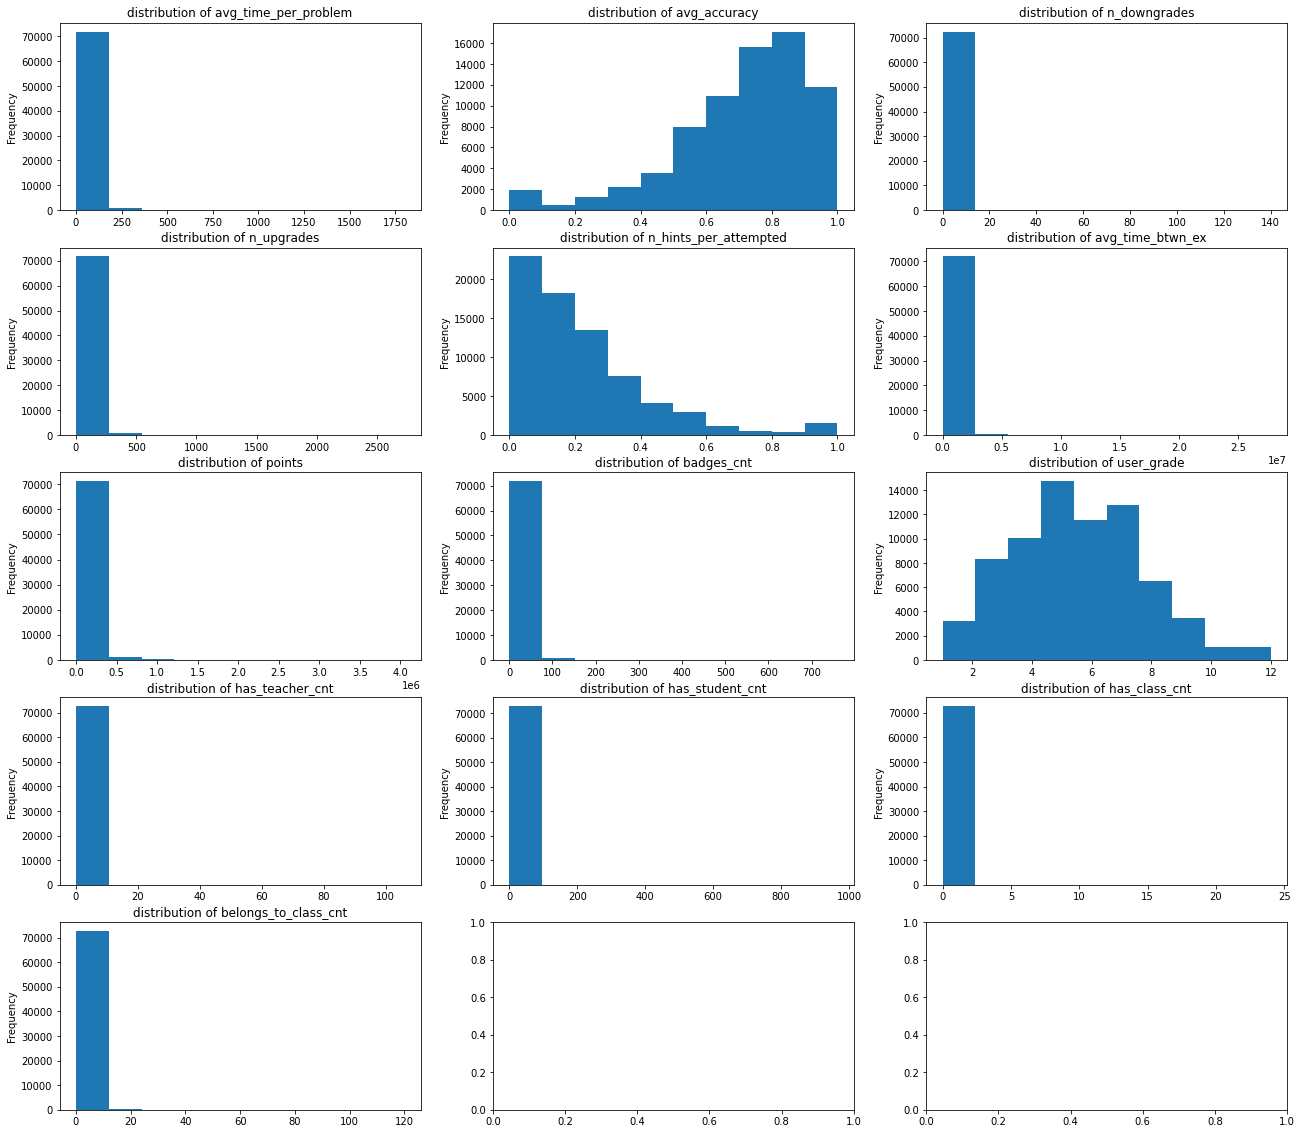

In [254]:
# check distribution
viz_data(clustering_input)


In [232]:
from sklearn.cluster import KMeans

def search_elbow(data):
    clusters = []

    for i in range(1, 11):
        km = KMeans(n_clusters=i).fit(data)
        clusters.append(km.inertia_)

    fig, ax = plt.subplots(figsize=(12, 8))
    sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
    ax.set_title('Searching for Elbow')
    ax.set_xlabel('Clusters')
    ax.set_ylabel('Inertia')

    plt.show()

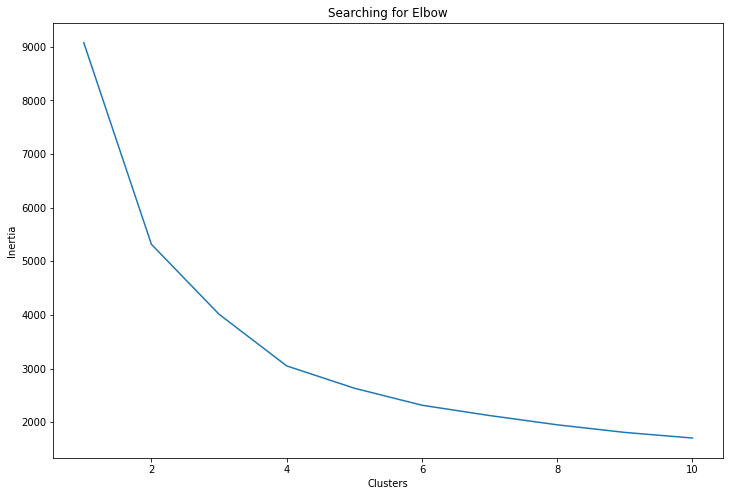

In [233]:
# cluster with avg accuracy
from sklearn.cluster import KMeans

search_elbow(scaled_clustering_input)

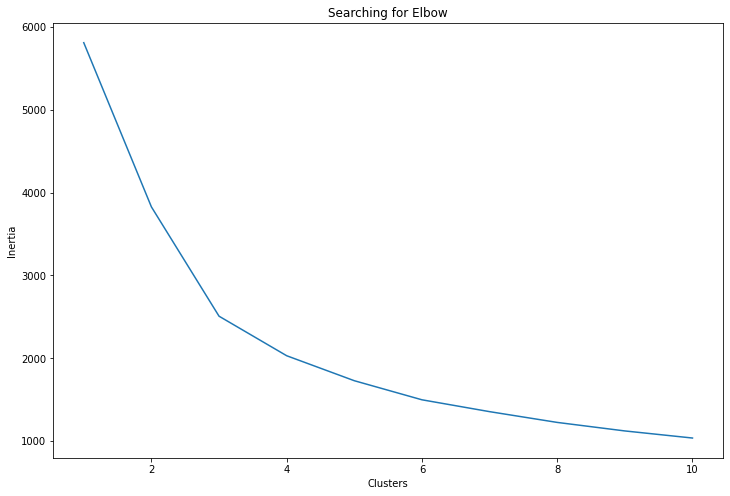

In [234]:
# cluster without avg accuracy
search_elbow(scaled_clustering_input.drop('avg_accuracy', axis=1))

If we include average accuracy, there are possible elbow points at 2 and 4. 
Without including accuracy, sees to only have elbow at 3. 

In [265]:
# fit 4 clusters
km4 = KMeans(n_clusters=4).fit(scaled_clustering_input)

In [272]:
def twoway_plot(x_data, y_data, labels):
    '''
    scatter plot of x and y data
    '''
    n_labels = len(np.unique(labels))
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x_data, y_data, hue=labels, palette=sns.color_palette('hls', n_labels))
    plt.title(f'KMeans with {n_labels} clusters')
    plt.show()

def violin_plot(data, labels):
    '''
    call to get distribution of clusters for each feature
    '''
    
    data['labels'] = pd.Series(labels, index=data.index)

    fig, axes = plt.subplots(5, 3, figsize=(24, 22))

    for i, col in enumerate(data.drop(columns='labels').columns):
        # print(col)
        target_ax = axes[i // 3, i % 3]
        sns.violinplot(x='labels', y=col, data=data, ax=target_ax)
        target_ax.set_title(f'Labels according to {col}')

    plt.show()

C:\Users\Timothy Lim\Anaconda3\envs\capstone\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


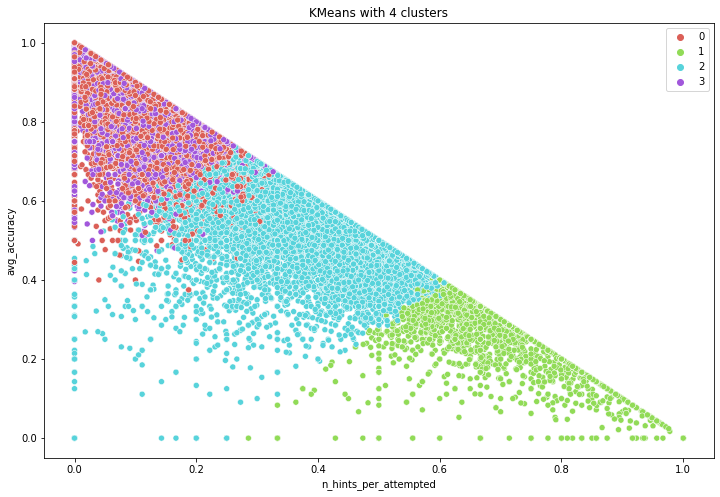

In [266]:
# 4 clusters
twoway_plot(scaled_clustering_input['n_hints_per_attempted'], scaled_clustering_input['avg_accuracy'],
           km4.labels_)


avg_accuracy and n_hints_per_attmpted are strongly correlated with each other. Makes sense since I think students will only be shown hints if they had gotten the question wrong the first time.  

Cluster 1 and 3 are clearly for weaker students, with average accuracies of less than roughly 60%. Cluster 0 and 2 seem to be more mixed.

C:\Users\Timothy Lim\Anaconda3\envs\capstone\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


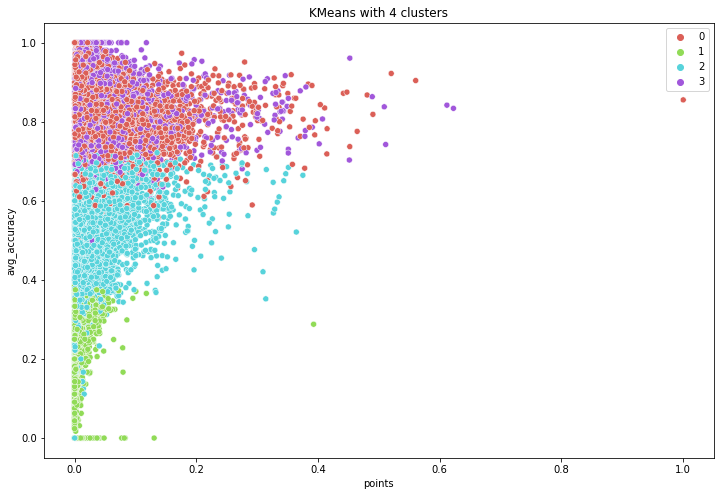

In [267]:
# 4 clusters
twoway_plot(scaled_clustering_input['points'], scaled_clustering_input['avg_accuracy'],
           km4.labels_)


Points was not useful in clustering, but this may have been due to the outliers. We can try using other preprocessing data transformations (eg. Quantile Transformers)

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

avg_time_per_problem
avg_accuracy
n_downgrades
n_upgrades
n_hints_per_attempted
avg_time_btwn_ex
points
badges_cnt
user_grade
has_teacher_cnt
has_student_cnt
has_class_cnt
belongs_to_class_cnt


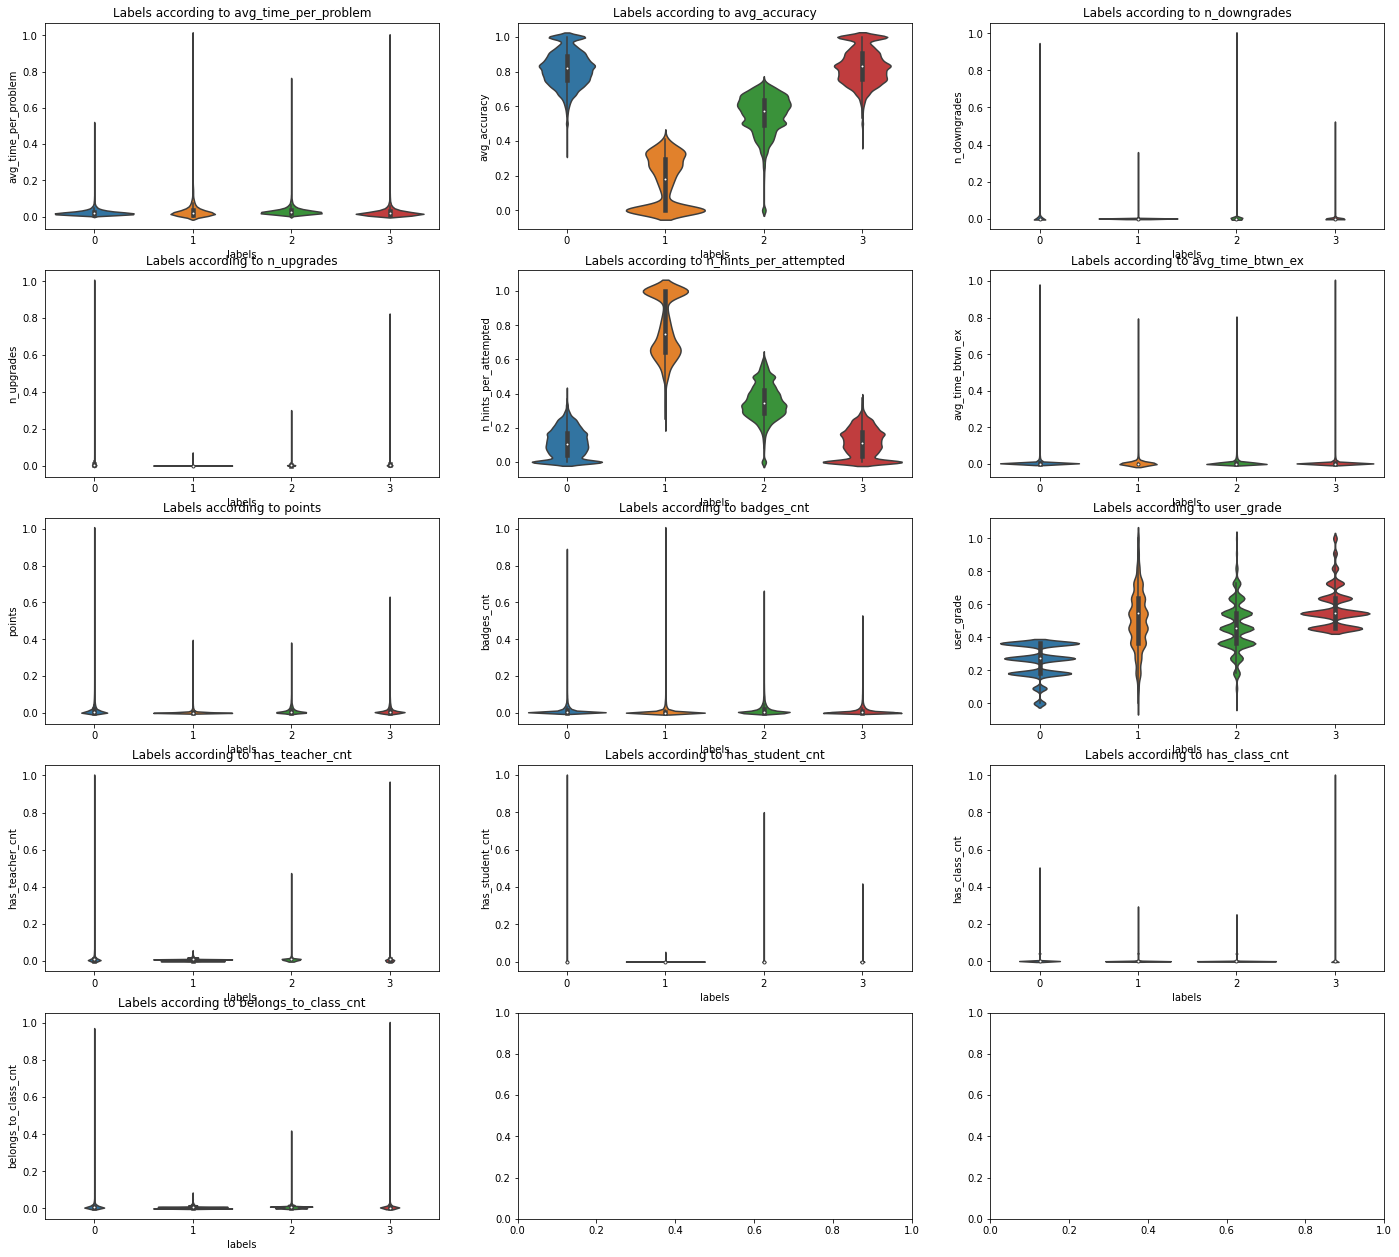

In [270]:
# violin plot
violin_plot(scaled_clustering_input, km4.labels_)


Seems like the clustering is only due to a few features, namely avg_accuracy, n_hints_per_attempted and user_grade

Basically, cluster 0 and 2 are for students with higher avg_accuracy. Clusters 0 and 2 are differentiated by the grade of the students. 

We lose a lot of information for the other clusters due to the presence of outliers, which MinMaxScaler does not handle well. 

In [247]:
from sklearn.preprocessing import QuantileTransformer

n_quantiles = 10  # can play around with this
trf = QuantileTransformer(n_quantiles, random_state=12345)
trf_clustering_input = scale_data(clustering_input, trf)
trf_clustering_input

C:\Users\Timothy Lim\Anaconda3\envs\capstone\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_quantiles=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,avg_time_per_problem,avg_accuracy,n_downgrades,n_upgrades,n_hints_per_attempted,avg_time_btwn_ex,points,badges_cnt,user_grade,has_teacher_cnt,has_student_cnt,has_class_cnt,belongs_to_class_cnt
0,0.783925,1.000000,0.0,0.222222,0.000000,0.000000,0.452801,0.333333,0.722222,0.611111,0.0,0.0,0.611111
1,0.098249,0.024687,0.0,0.000000,0.944828,0.000000,0.052265,0.500000,0.722222,0.611111,0.0,0.0,0.611111
2,0.889603,0.393241,0.0,0.222222,0.741272,0.000000,0.333008,0.000000,0.388889,0.611111,0.0,0.0,0.611111
3,0.498587,0.195169,0.0,0.333333,0.883869,0.550125,0.292215,0.000000,0.555556,0.611111,0.0,0.0,0.611111
4,0.390529,0.807645,0.0,0.755556,0.168459,0.620788,0.655176,0.444444,0.722222,0.611111,0.0,0.0,0.611111
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72753,0.892218,0.808984,0.0,0.481481,0.355687,0.236660,0.277940,0.000000,0.916667,0.611111,0.0,0.0,0.611111
72754,0.889444,0.333333,0.0,0.444444,0.680482,0.225152,0.157199,0.000000,0.222222,0.000000,0.0,0.0,0.000000
72755,0.640980,0.187913,0.0,0.733333,0.734346,0.829242,0.600259,0.555556,0.111111,0.889957,0.0,0.0,0.890772
72756,0.068018,0.931898,0.0,0.444444,0.188406,0.225152,0.291348,0.333333,0.388889,0.611111,0.0,0.0,0.000000


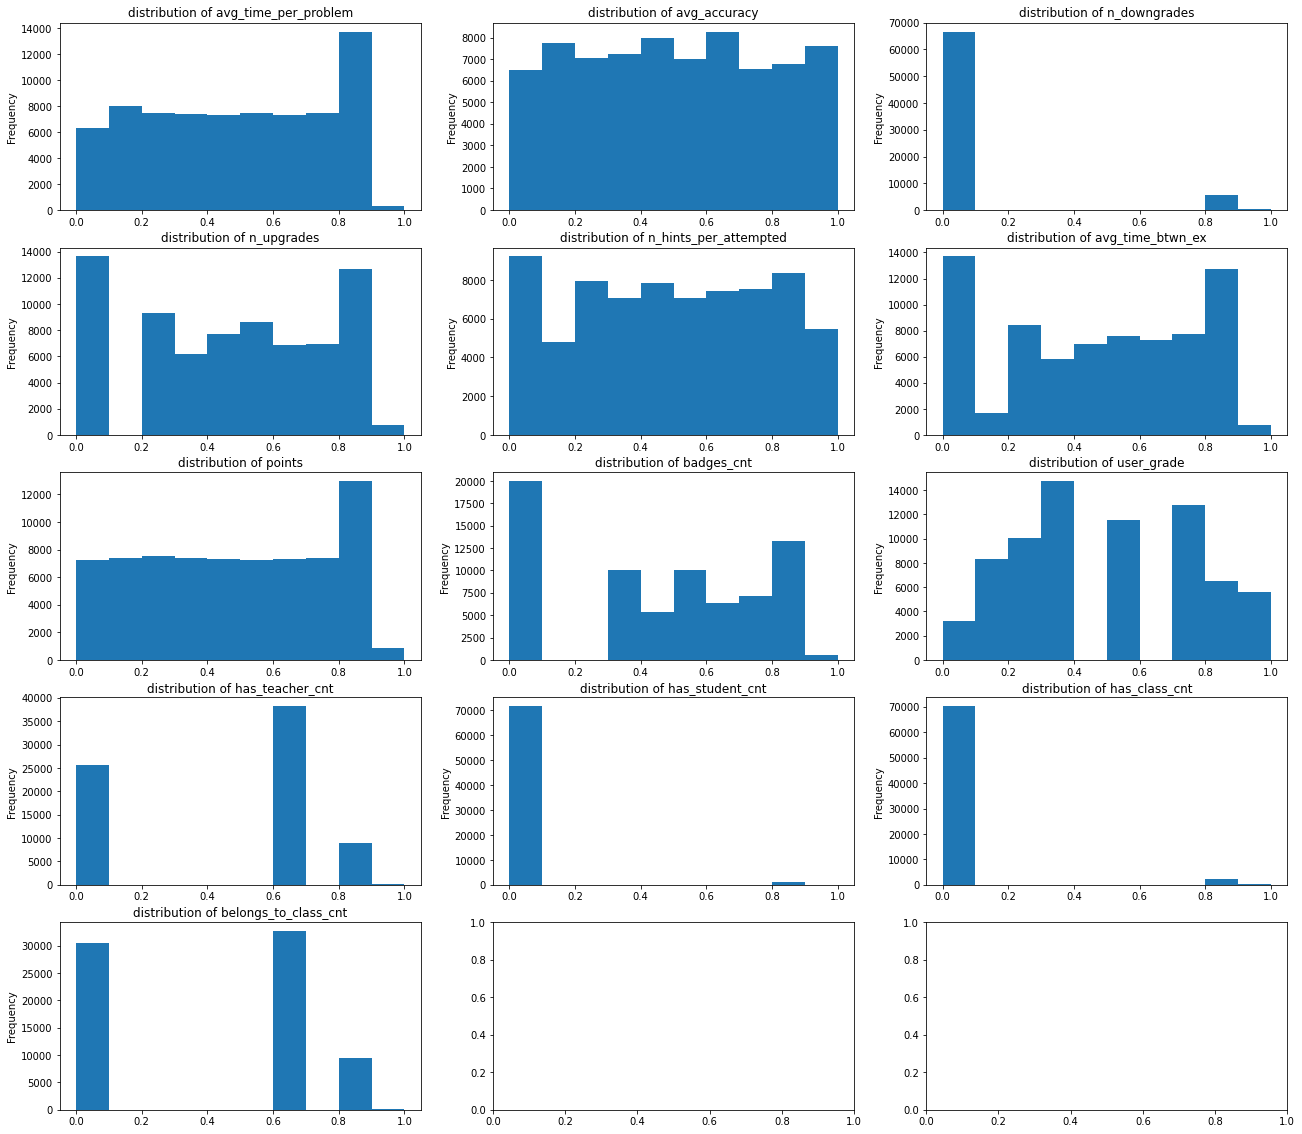

In [248]:
# check distribution
fig, axes = plt.subplots(5, 3, figsize=(22, 20))

for i, col in enumerate(trf_clustering_input.columns):
    target_ax = axes[i // 3, i % 3]
    trf_clustering_input[col].plot(kind='hist', ax=target_ax,
                                  title=f'distribution of {col}')

plt.show()


Looks better? Though might have to remove some features (eg. has_student_cnt)

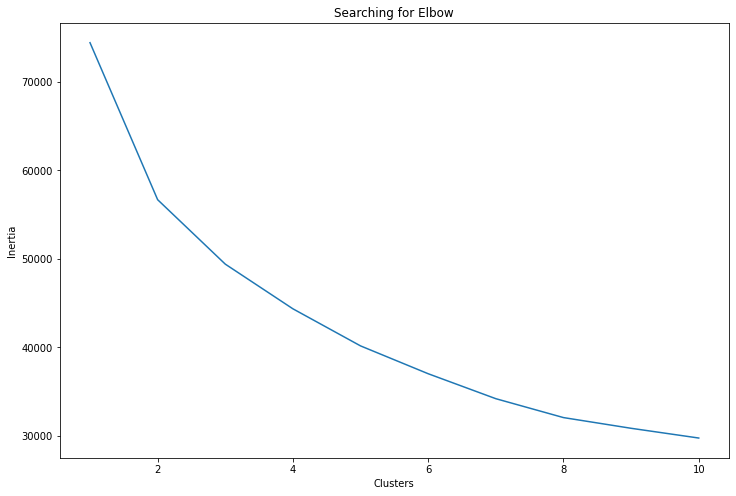

In [249]:
# searching for elbow
search_elbow(trf_clustering_input)

RIP 

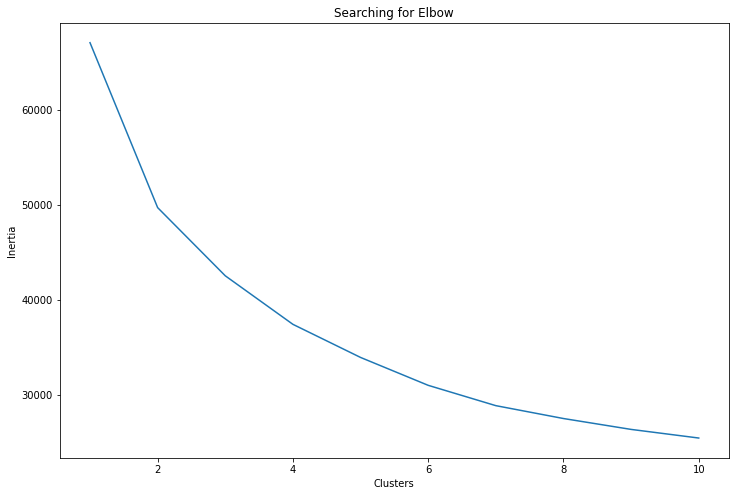

In [250]:
# try dropping some cols
drop_cols = ['n_downgrades', 'has_student_cnt', 'has_class_cnt']
search_elbow(trf_clustering_input.drop(drop_cols, axis=1))

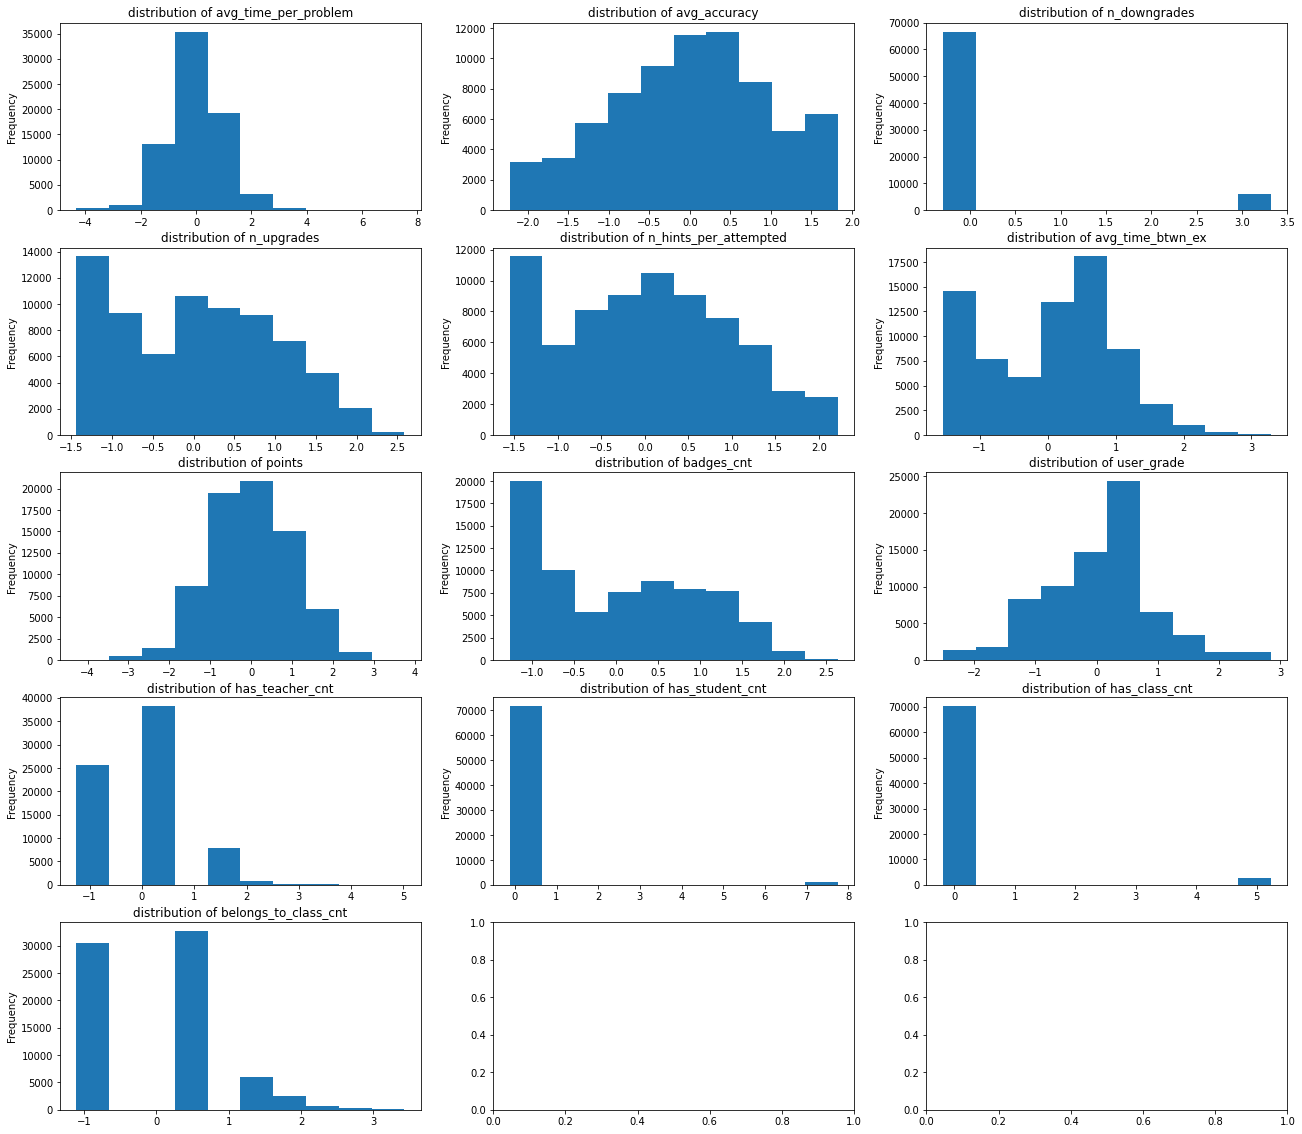

In [284]:
from sklearn.preprocessing import PowerTransformer
# Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. 
pwr = PowerTransformer()
pwr_clustering_input = scale_data(clustering_input, pwr)
viz_data(pwr_clustering_input)


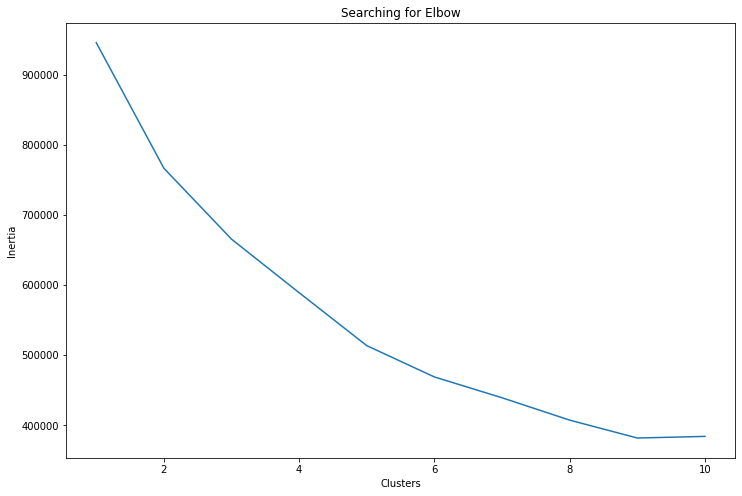

In [285]:
search_elbow(pwr_clustering_input)

In [286]:
# we can try 5 clusters....? but the inertia is not v low

km5 = KMeans(n_clusters=5).fit(pwr_clustering_input)
np.unique(km5.labels_, return_counts=True)

(array([0, 1, 2, 3, 4]),
 array([15460,  5754,  1192, 21380, 28972], dtype=int64))

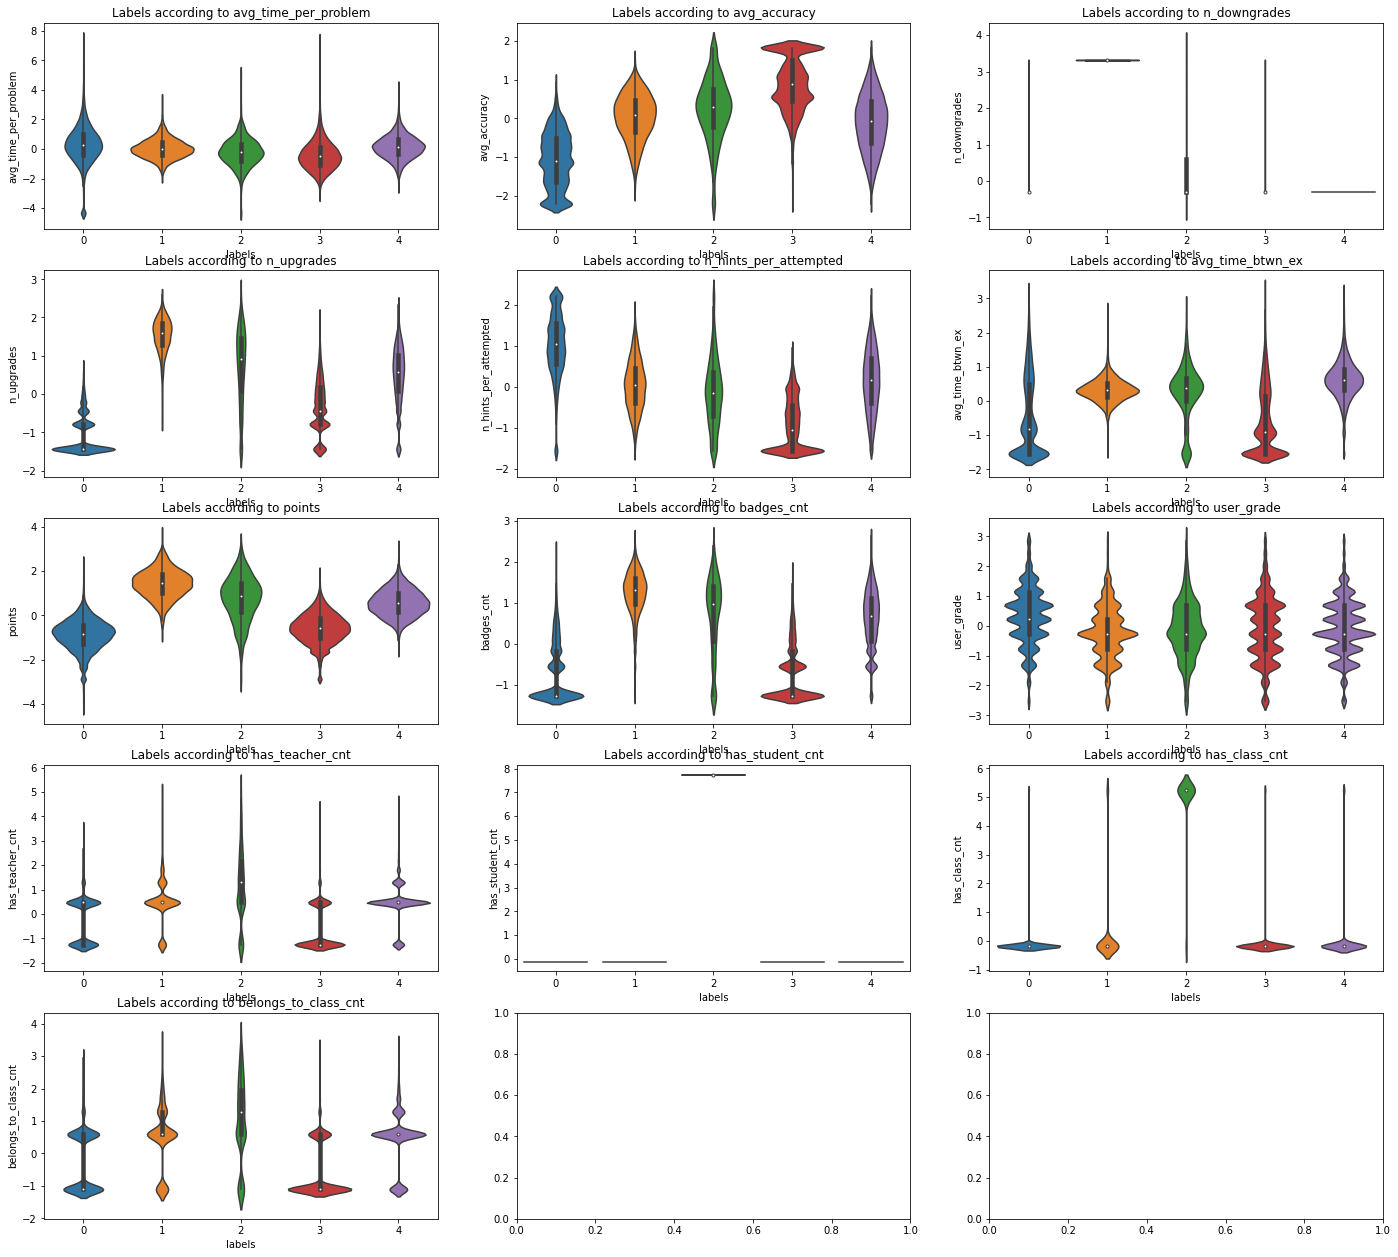

In [295]:
violin_plot(pwr_clustering_input, km5.labels_)

In [ ]:
# try clustering with this github repo: https://github.com/Csinclair0/feature_learning 

from feature_learning import return_weighted_distance, c_means
w = return_weighted_distance(clustering_input[:10000])
fcm = c_means()
fcm.fit(clustering_input, w)

shit!

Is this better? Is this worse? At least the clustering is no longer dominated by a few features anymore

Possible to consider removing outliers completely? Or clipping them at some value..

To do: 
* learning path analysis